In [7]:
%pylab inline

from library import lasagnennet as LN
from library import features as F
from library import scale as S
from library import validate as V
import numpy as np
import theano as TH
import pandas as pa
import lasagne as L

import time

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
train_feats = pa.read_csv('full_train_feats.csv')
# train_targets = pa.read_csv('full_train_targets.csv')
# # val_feats = pa.read_csv('validation_feats.csv')
# # val_targets = pa.read_csv('validation_targets.csv')
# vval_feats = pa.read_csv('val_train_feats.csv')
# vval_targets = pa.read_csv('val_train_targets.csv')

In [4]:
tx = np.asarray(train_feats, dtype=np.float32)
# tyall = np.asarray(train_targets, dtype=np.int32)
# ty = np.asarray(train_targets['LABEL'], dtype=np.int32).reshape(-1, 1)
# vx = np.asarray(val_feats, dtype=np.float32)
# vyall = np.asarray(val_targets, dtype=np.float32)
# vy = np.asarray(val_targets['LABEL'], dtype=np.float32).reshape(-1, 1)

In [ ]:
from sklearn.svm import OneClassSVM
starttime = time.time()
clf = OneClassSVM(max_iter=1)
clf.fit(tx)
endtime = time.time()

print "Took {} mins".format((starttime-endtime)*1.0/60)

In [ ]:
valx = np.asarray(vval_feats, dtype=np.float32)
valyall = np.asarray(vval_targets, dtype=np.int64)

In [ ]:
vallabels = np.asarray(pa.read_csv('Validation_Data/id_label_val.csv'), dtype=np.int32)

In [ ]:
ty = ty.ravel()
# vy = vy.ravel()

In [7]:
print tx.shape, tyall.shape, ty.shape, valx.shape # vx.shape, vyall.shape, vy.shape,

(628437, 129) (628437, 4) (628437,) (199971, 129)


In [8]:
maxtimes = [0 for i in xrange(5000)]
for it, i in enumerate(tyall):
    maxtimes[i[0]] = max(maxtimes[i[0]], it)
maxtimes = set(maxtimes)
maxtimes = np.asarray([i for i in maxtimes])
print maxtimes
newlabels = [0 for i in xrange(tyall.shape[0])]
for i in maxtimes:
    if tyall[i,2] == 1:
        newlabels[i] = 1
newlabels = np.asarray(newlabels)
print np.sum(newlabels)

[     0  16385 557058 ..., 494250 516094 468309]
246


In [ ]:
from sklearn import cluster
clus = cluster.KMeans(n_clusters=1000, init='k-means++', verbose=1, n_jobs=3, max_iter=10, n_init=1)
classes = clus.fit_predict(tx)

In [9]:
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn.metrics import auc_score

In [ ]:
clf = svm.SVC(verbose=True, max_iter=1, class_weight={0:0, 1:1})
clf.fit(tx, newlabels)

In [40]:
tprobs = clf.decision_function(tx)
# vprobs = clf.decision_function(vx)
# valprobs = clf.decision_function(valx)

In [19]:
print tprobs

[ 0.03918062  0.05856521  0.05856521 ...,  0.02660812  0.02660812
  0.02660812]


0.939759976382


/home/biswajit/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function auc_score is deprecated; Function 'auc_score' has been renamed to 'roc_auc_score' and will be removed in release 0.16.
  warnings.warn(msg, category=DeprecationWarning)


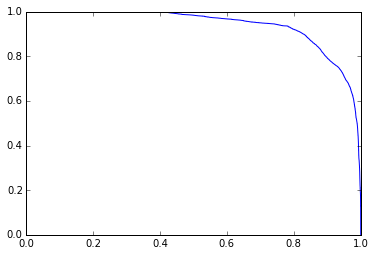

In [23]:
yscore = tprobs.ravel()
fpr, tpr, thresh = roc_curve(ty, yscore)
auc = auc_score(ty, yscore)
print auc
display(pyplot.plot(1-fpr, tpr,))

# yscore = vprobs.ravel()
# fpr, tpr, thresh = roc_curve(vy, yscore)
# auc = auc_score(vy, yscore)
# print auc
# display(pyplot.plot(1-fpr, tpr,))

In [45]:
print 'C 1'
print np.percentile(valprobs.ravel(), 99)
print np.percentile(valprobs.ravel(), 99.5)

thresh = np.percentile(valprobs.ravel(), 99.9)
# thresh = 0.37
print thresh
pred = np.int32(valprobs.ravel() >= thresh)
print np.sum(pred)

print '******\nC 2'
print np.percentile(valprobs1.ravel(), 99)
print np.percentile(valprobs1.ravel(), 99.5)

thresh1 = np.percentile(valprobs1.ravel(), 99.3)
# thresh = 0.37
print thresh1
pred1 = np.int32(valprobs1.ravel() >= thresh1)
print np.sum(pred1)

print '*****'

pred = np.int32(pred1+pred>0)
# pred = pred1


outfile = open('out.csv', 'w')
dids = set()
alltimes = [nan for i in xrange(5000)]
outfile.write('ID,TIME,LABEL,ICU\n')
for i in xrange(valx.shape[0]):
    if np.int64(valyall[i,2]) == 1:
        outfile.write(str(valyall[i,0])+','+str(valyall[i,1])+','+str(pred[i])+',1\n')
        if pred[i] == 1:
            tid = valyall[i,0]
            dids.add(tid)
            if np.isnan(alltimes[tid]):
                alltimes[tid] = valyall[i,1]
            
outfile.close()
print len(dids)
print np.nanmedian(alltimes)/3600

0.406092323258
8151


In [26]:
# for i in vprobs[np.where(vprobs.ravel()>=thresh)]:
#     print i

In [38]:
print 'C 1'
print np.percentile(valprobs.ravel(), 99)
print np.percentile(valprobs.ravel(), 99.5)

thresh = np.percentile(valprobs.ravel(), 99.9)
# thresh = 0.37
print thresh
pred = np.int32(valprobs.ravel() >= thresh)
print np.sum(pred)

print '******\nC 2'
print np.percentile(valprobs1.ravel(), 99)
print np.percentile(valprobs1.ravel(), 99.5)

thresh1 = np.percentile(valprobs1.ravel(), 99.3)
# thresh = 0.37
print thresh1
pred1 = np.int32(valprobs1.ravel() >= thresh1)
print np.sum(pred1)

print '*****'

pred = np.int32(pred1+pred>0)
# pred = pred1


outfile = open('output.csv', 'w')
dids = set()
alltimes = [nan for i in xrange(5000)]
# outfile.write('ID,TIME,LABEL\n')
for i in xrange(valx.shape[0]):
    if np.int64(valyall[i,2]) == 1:
        outfile.write(str(valyall[i,0])+','+str(valyall[i,1])+','+str(pred[i])+'\n')
        if pred[i] == 1:
            tid = valyall[i,0]
            dids.add(tid)
            if np.isnan(alltimes[tid]):
                alltimes[tid] = valyall[i,1]
            
outfile.close()
print len(dids)
print np.nanmedian(alltimes)/3600

C 1
0.444775834728
0.468292352666
0.505818388697
200
******
C 2
0.410538999118
0.451752378844
0.440680311185
1401
*****
22
26.1708333333


In [46]:
reload(V)
V.validate('out.csv', './Training_Dataset/id_label_train.csv')

tp :  29 , tn :  809 , fp :  5 , fn :  27
sensitivity :  0.517857142857 , specificity :  0.993857493857
accuracy :  0.963218390805 median prediction time :  37.5416666667
finalScore :  51.1962733838


(0.5178571428571429,
 0.9938574938574939,
 0.9632183908045977,
 37.541666666666664,
 51.1962733837734)